# **1. Perkenalan Dataset**


Dalam eksperimen ini, saya menggunakan dataset Iris, yang merupakan dataset klasik dalam machine learning dan statistik.

Dataset Iris terdiri dari 150 sampel bunga iris dari tiga spesies berbeda (Iris setosa, Iris virginica, dan Iris versicolor), dengan 50 sampel untuk masing-masing spesies. Untuk setiap sampel, empat fitur diukur: panjang dan lebar kelopak (sepal), serta panjang dan lebar mahkota (petal) dalam sentimeter.

Dataset ini sering digunakan untuk tugas klasifikasi, di mana tujuannya adalah memprediksi spesies bunga iris berdasarkan empat fitur tersebut.

# **2. Import Library**

Pada tahap ini, saya akan mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [13]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed untuk reproducibility
np.random.seed(42)

# **3. Memuat Dataset**

Pada tahap ini, saya akan memuat dataset Iris yang tersedia di scikit-learn. Setelah itu, saya akan melihat struktur data dan memastikan data telah dimuat dengan benar.

In [14]:
# Load dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Tampilkan informasi dataset
print(f"Jumlah data: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah kelas: {len(np.unique(y))}")
print(f"Distribusi kelas: {pd.Series(y).value_counts().to_dict()}")

# Simpan dataset asli
iris_df = pd.concat([X, y], axis=1)
iris_df.to_csv('../namadataset_raw/iris_raw.csv', index=False)

# Tampilkan beberapa data awal
iris_df.head()

Jumlah data: 150
Jumlah fitur: 4
Jumlah kelas: 3
Distribusi kelas: {0: 50, 1: 50, 2: 50}


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, saya akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [15]:
# Statistik deskriptif
print("Statistik deskriptif:")
print(X.describe())

Statistik deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [16]:
# Periksa nilai yang hilang
print("Jumlah nilai yang hilang pada setiap fitur:")
print(X.isnull().sum())

Jumlah nilai yang hilang pada setiap fitur:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


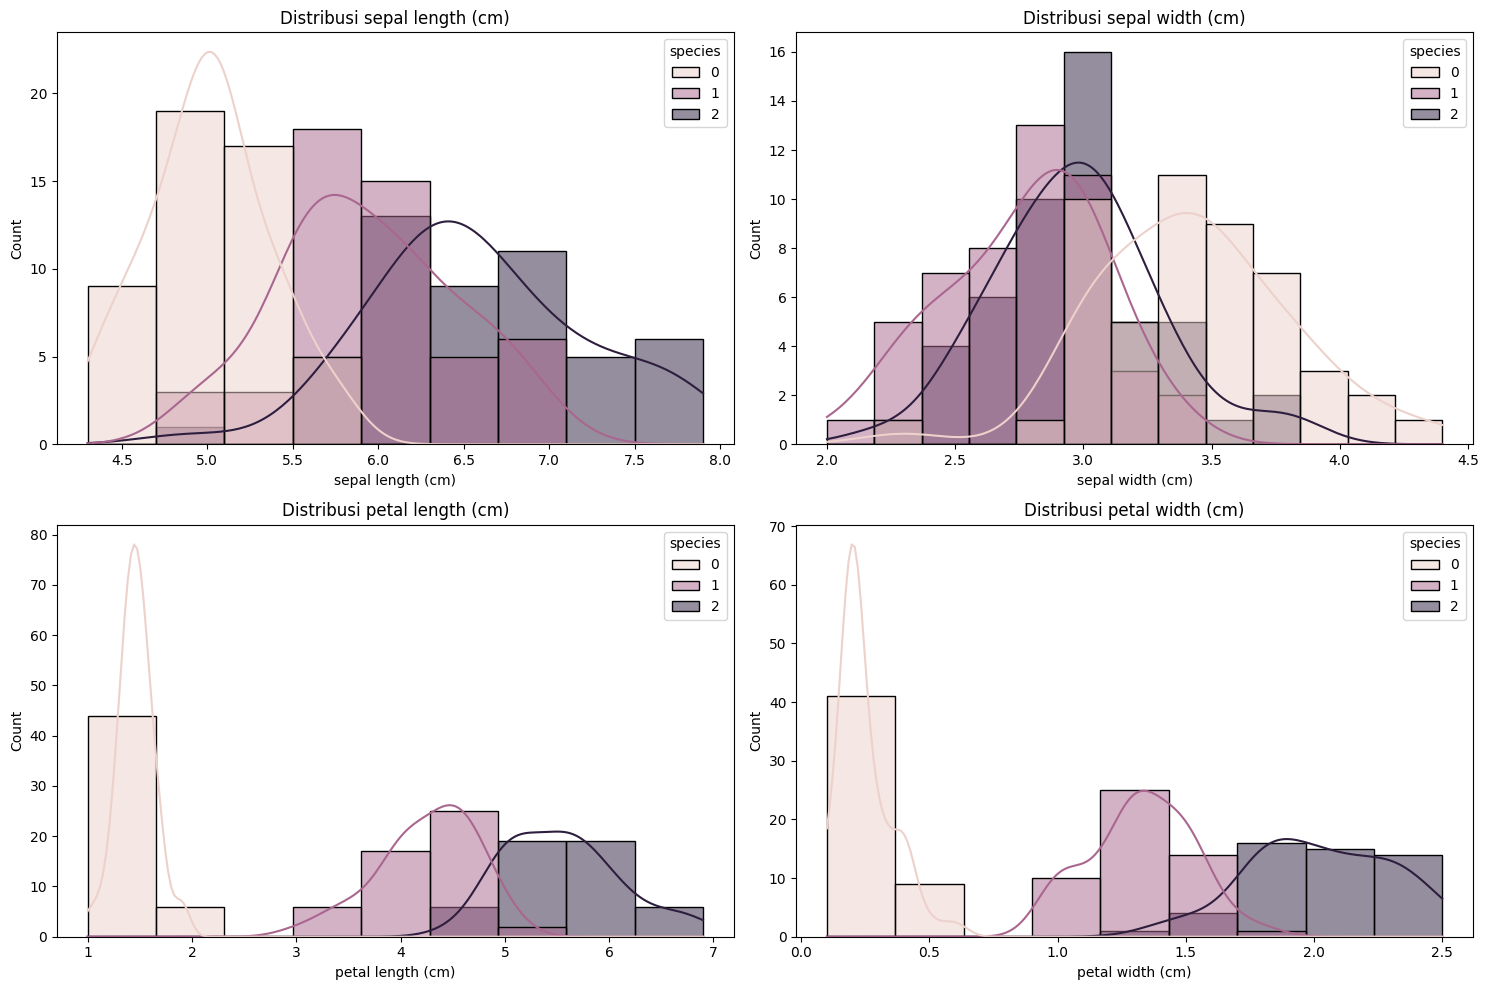

In [17]:
# Visualisasi distribusi fitur
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=iris_df, x=feature, hue='species', kde=True)
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

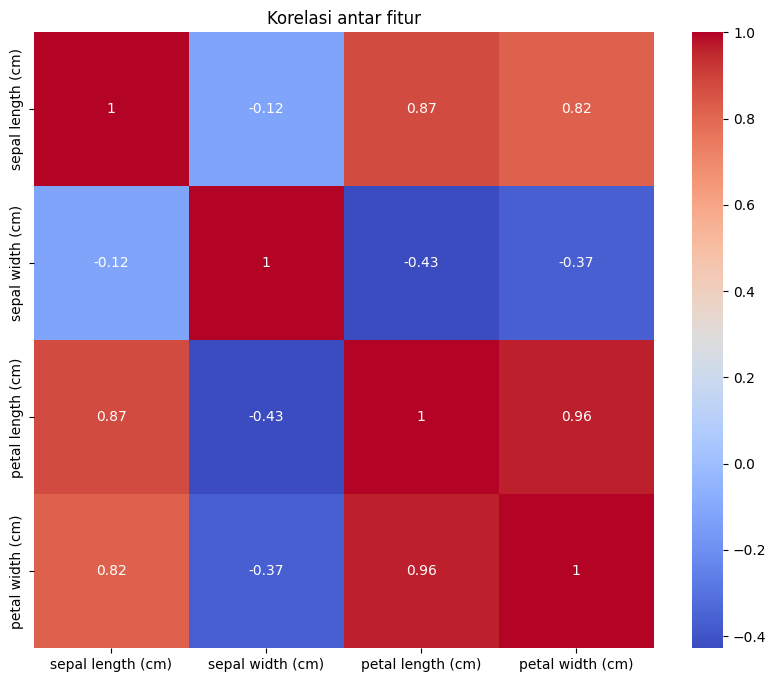

In [18]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur')
plt.show()

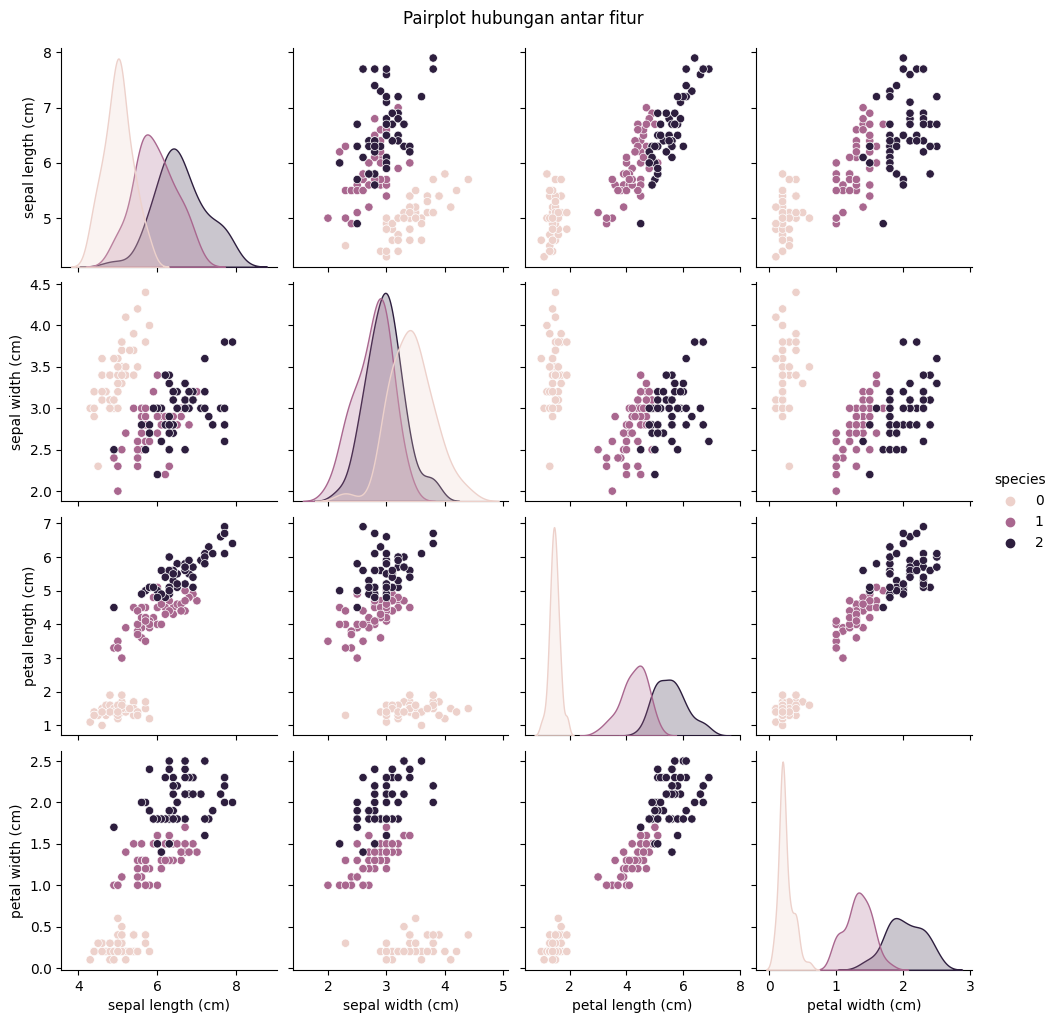

In [19]:
# Pairplot untuk visualisasi hubungan antar fitur
sns.pairplot(iris_df, hue='species')
plt.suptitle('Pairplot hubungan antar fitur', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Berikut adalah tahapan-tahapan yang akan dilakukan:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Deteksi dan Penanganan Outlier
3. Standarisasi Fitur
4. Split Data menjadi Training dan Testing Set
5. Menyimpan Data Hasil Preprocessing

In [20]:
# 1. Periksa dan tangani nilai yang hilang
print("Jumlah nilai yang hilang pada setiap fitur sebelum penanganan:")
print(X.isnull().sum())

# 2. Deteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

outliers = detect_outliers_iqr(X)
print("\nJumlah outlier pada setiap fitur:")
for col, count in outliers.items():
    print(f"{col}: {count}")

Jumlah nilai yang hilang pada setiap fitur sebelum penanganan:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Jumlah outlier pada setiap fitur:
sepal length (cm): 0
sepal width (cm): 4
petal length (cm): 0
petal width (cm): 0


Data setelah standarisasi:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -9.473903e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00  


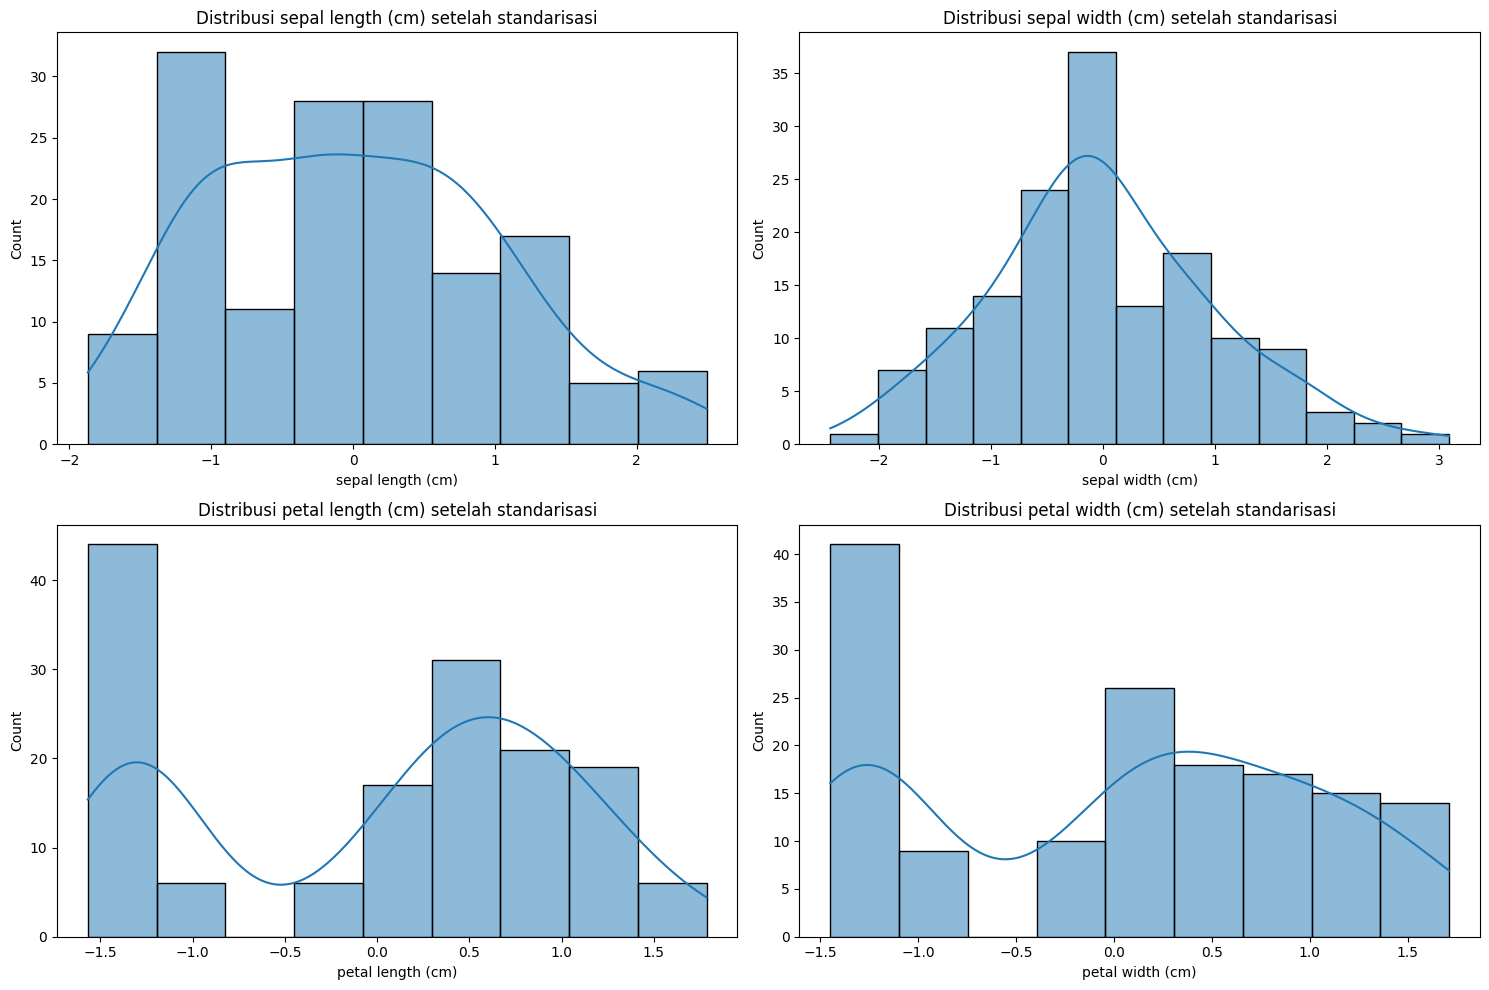

In [21]:
# 3. Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Data setelah standarisasi:")
print(X_scaled_df.describe())

# Visualisasi data setelah standarisasi
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(X_scaled_df[feature], kde=True)
    plt.title(f'Distribusi {feature} setelah standarisasi')
plt.tight_layout()
plt.show()

In [22]:
# 4. Persiapkan data untuk pemodelan
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah sampel training: {X_train.shape[0]}")
print(f"Jumlah sampel testing: {X_test.shape[0]}")

Jumlah sampel training: 120
Jumlah sampel testing: 30


In [23]:
# 5. Simpan data hasil preprocessing
# Buat DataFrame untuk data yang telah dipreprocessing
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
iris_preprocessed = pd.concat([X_scaled_df, y], axis=1)

# Simpan data hasil preprocessing
iris_preprocessed.to_csv('../preprocessing/namadataset_preprocessing/iris_preprocessed.csv', index=False)

print("Data hasil preprocessing telah disimpan.")

Data hasil preprocessing telah disimpan.
